<a href="https://colab.research.google.com/github/nedlecky/CSC485B/blob/main/CSC485_120_Pythagoras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 485B Spring 2023: CSC485_120_Pythagoras using Linear Regression (+Poly?)
## Can we figure out the Pythagorean Theorem?
### Input the length of the two sides, ML computes hypotenuse, perimeter, and area
* SUNY Plattsburgh, Spring 2023
* Dr. Ned Lecky
* nleck001@plattsburgh.edu
* ned@lecky.com

In [26]:
# Setup and Support Functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This makes us reproducible (and we can adjust fixed_seed to get different results)
fixed_seed = 1
np.random.seed(fixed_seed)

# Return n random floats between lo and hi as 1-column NumPy matrix
def rand_nlohi(n=1, lo=0, hi=1):
  # This is just a uniform distribution from lo to hi... we can adjust if appropriate in the future
  return (np.random.rand(n) * (hi - lo) + lo).reshape(-1,1)

def nprint(m, name=''):
  print(f"{name} {m.shape} {m.dtype}")
  print(m)



In [27]:
# Test input data for right triangles
# Reminder: We tell you the length of the two sides, you compute length of hypotenuse, perimeter, and area
# x = [side1, side2]
# y = [hypotenuse, perimeter, area]
N = 100
side1 = rand_nlohi(N,1,100)
side2 = rand_nlohi(N,1,100)
X = np.hstack([side1, side2])
nprint(X, 'X')


X (100, 2) float64
[[42.3 33.3]
 [72.3 53.2]
 [ 1.  88.7]
 [30.9 36.4]
 [15.5 90.9]
 [10.1 62.7]
 [19.4  2.6]
 [35.2 93. ]
 [40.3 69.4]
 [54.3 99.7]
 [42.5 18.1]
 [68.8 14.6]
 [21.2 93.3]
 [87.9 70. ]
 [ 3.7  7.5]
 [67.4 75.8]
 [42.3 75.6]
 [56.3 92.4]
 [14.9 71.4]
 [20.6 13.3]
 [80.3  3. ]
 [96.9  3.6]
 [32.   3.8]
 [69.5 25.4]
 [87.8 86.1]
 [89.6 54.3]
 [ 9.4 55.7]
 [ 4.9 84.4]
 [17.8 13.3]
 [87.9 28.6]
 [10.7 59. ]
 [42.7 97. ]
 [95.8 56.5]
 [53.8  2.8]
 [69.5 80.3]
 [32.2 24.1]
 [69.  80.9]
 [83.6 39.4]
 [ 2.8 86.5]
 [75.3 75. ]
 [98.9 56.1]
 [75.1 14.5]
 [28.8  6.9]
 [79.1 13. ]
 [11.2  5.4]
 [45.3 11.6]
 [91.  23.3]
 [30.1 71.6]
 [29.5 56.4]
 [13.9  2.2]
 [ 2.9  8.1]
 [68.2 96.8]
 [22.  57.2]
 [27.3 21.1]
 [49.7 26. ]
 [ 6.3 74.6]
 [57.8 20.3]
 [15.5 58.6]
 [59.3 97. ]
 [70.3 84.8]
 [11.1 24.7]
 [42.  49.9]
 [69.7 62.4]
 [42.  83.1]
 [ 5.9 16.5]
 [54.1  2.8]
 [66.7  7.9]
 [52.  49.1]
 [94.5 61. ]
 [59.1 57.3]
 [90.4 32.4]
 [14.6 98.9]
 [14.8 58.4]
 [80.9 38.6]
 [40.4 55.5]
 [17.4

In [28]:
# Now let's compute the expected results
# Reminder: We tell you the length of the two sides, you compute length of hypotenuse, perimeter, and area
# x = [side1, side2]
# y = [hypotenuse, perimeter, area]
hypotenuse = np.sqrt(np.square(side1) + np.square(side2))
perimeter = side1 + side2 + hypotenuse
area = (side1 * side2) / 2.
Y = np.hstack([hypotenuse, perimeter, area])
nprint(Y,'Y')


Y (100, 3) float64
[[  53.8  129.5  704.8]
 [  89.8  215.3 1922.7]
 [  88.7  178.4   44.9]
 [  47.7  115.   562.5]
 [  92.3  198.7  706.1]
 [  63.5  136.4  318. ]
 [  19.6   41.6   24.9]
 [  99.5  227.7 1637.5]
 [  80.2  189.9 1397.7]
 [ 113.6  267.7 2709.9]
 [  46.2  106.7  383.8]
 [  70.4  153.8  501.7]
 [  95.7  210.3  991.2]
 [ 112.4  270.3 3077. ]
 [   8.4   19.6   14. ]
 [ 101.4  244.6 2553.3]
 [  86.7  204.6 1600.2]
 [ 108.2  256.9 2601. ]
 [  73.   159.3  532.2]
 [  24.5   58.4  137.1]
 [  80.3  163.6  119.1]
 [  96.9  197.4  174.1]
 [  32.3   68.1   60.9]
 [  74.   168.9  882.3]
 [ 123.   296.9 3780.1]
 [ 104.8  248.7 2433.7]
 [  56.5  121.7  262.5]
 [  84.5  173.7  205.3]
 [  22.2   53.3  118.4]
 [  92.5  209.1 1259.2]
 [  60.   129.7  316.7]
 [ 106.   245.6 2070.2]
 [ 111.3  263.6 2709.2]
 [  53.9  110.5   76.5]
 [ 106.2  255.9 2789. ]
 [  40.2   96.5  387.9]
 [ 106.3  256.2 2789.7]
 [  92.4  215.5 1647.4]
 [  86.5  175.8  121.5]
 [ 106.2  256.5 2821.1]
 [ 113.7  268.6 2772.

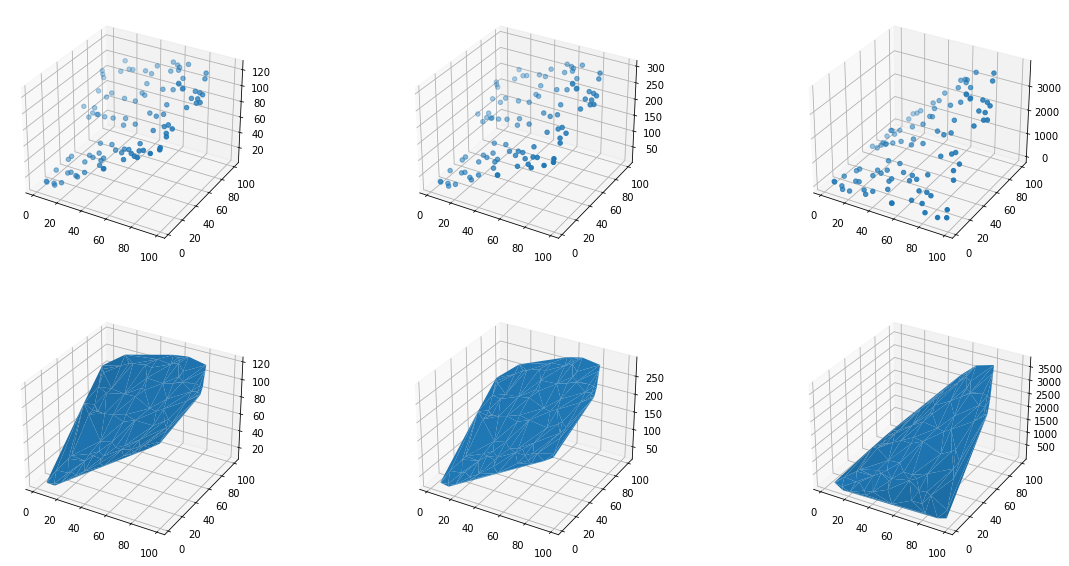

In [29]:
# Let's take a look at the sample data as 3D
# Not too useful!

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(231,projection='3d')
ax2 = fig.add_subplot(232,projection='3d')
ax3 = fig.add_subplot(233,projection='3d')
ax4 = fig.add_subplot(234,projection='3d')
ax5 = fig.add_subplot(235,projection='3d')
ax6 = fig.add_subplot(236,projection='3d')

ax1.scatter(X[:,0], X[:,1], Y[:,0], marker='o')
ax2.scatter(X[:,0], X[:,1], Y[:,1], marker='o')
ax3.scatter(X[:,0], X[:,1], Y[:,2], marker='o')
ax4.plot_trisurf(X[:,0], X[:,1], Y[:,0])
ax5.plot_trisurf(X[:,0], X[:,1], Y[:,1])
ax6.plot_trisurf(X[:,0], X[:,1], Y[:,2])

fig.show()


In [30]:
# Make sure your Google Drive is mounted
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# Let's get it out where we can play in Excel?
triangle_data = pd.DataFrame(np.hstack([X, Y]), columns=['side1','side2','hyp','perim','area'])
triangle_data.to_csv('triangle_data.csv')

triangle_data.to_csv('drive/MyDrive/triangle_data.csv')
triangle_data.to_excel('drive/MyDrive/triangle_data.xlsx')


In [32]:
# Now let's train a linear regression (This should be terrible?)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

def train_and_test(X, Y):
  global regr # This will leave the last used regr around so we can experiment with it below
  regr = linear_model.LinearRegression()
  regr.fit(X, Y)

  np.set_printoptions(precision=1) # This seems to be necessary
  print(f"Coefficients: {regr.coef_}")
  print(f"Offsets: {regr.intercept_}")

  Y_pred = regr.predict(X)
  print(f"Mean squared error: {mean_squared_error(Y, Y_pred):.2f}")
  print(f"Mean absolute error: {mean_absolute_error(Y, Y_pred):.2f}")

  e = pd.DataFrame(Y-Y_pred,columns=['dHyp','dPerim','dArea'])
  e.describe()

train_and_test(X,Y)

Coefficients: [[ 0.7  0.7]
 [ 1.7  1.7]
 [23.9 23.2]]
Offsets: [    8.4     8.4 -1117.6]
Mean squared error: 63148.27
Mean absolute error: 119.52


In [33]:
# One way to do "nonlinear regression" is to add additional nonlinear versions of X to it...
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_added_poly = poly.fit_transform(X)
nprint(X, 'X')
nprint(X_added_poly, 'X_added_poly')
train_and_test(X_added_poly, Y)

X (100, 2) float64
[[42.3 33.3]
 [72.3 53.2]
 [ 1.  88.7]
 [30.9 36.4]
 [15.5 90.9]
 [10.1 62.7]
 [19.4  2.6]
 [35.2 93. ]
 [40.3 69.4]
 [54.3 99.7]
 [42.5 18.1]
 [68.8 14.6]
 [21.2 93.3]
 [87.9 70. ]
 [ 3.7  7.5]
 [67.4 75.8]
 [42.3 75.6]
 [56.3 92.4]
 [14.9 71.4]
 [20.6 13.3]
 [80.3  3. ]
 [96.9  3.6]
 [32.   3.8]
 [69.5 25.4]
 [87.8 86.1]
 [89.6 54.3]
 [ 9.4 55.7]
 [ 4.9 84.4]
 [17.8 13.3]
 [87.9 28.6]
 [10.7 59. ]
 [42.7 97. ]
 [95.8 56.5]
 [53.8  2.8]
 [69.5 80.3]
 [32.2 24.1]
 [69.  80.9]
 [83.6 39.4]
 [ 2.8 86.5]
 [75.3 75. ]
 [98.9 56.1]
 [75.1 14.5]
 [28.8  6.9]
 [79.1 13. ]
 [11.2  5.4]
 [45.3 11.6]
 [91.  23.3]
 [30.1 71.6]
 [29.5 56.4]
 [13.9  2.2]
 [ 2.9  8.1]
 [68.2 96.8]
 [22.  57.2]
 [27.3 21.1]
 [49.7 26. ]
 [ 6.3 74.6]
 [57.8 20.3]
 [15.5 58.6]
 [59.3 97. ]
 [70.3 84.8]
 [11.1 24.7]
 [42.  49.9]
 [69.7 62.4]
 [42.  83.1]
 [ 5.9 16.5]
 [54.1  2.8]
 [66.7  7.9]
 [52.  49.1]
 [94.5 61. ]
 [59.1 57.3]
 [90.4 32.4]
 [14.6 98.9]
 [14.8 58.4]
 [80.9 38.6]
 [40.4 55.5]
 [17.4

In [34]:
# That looks pretty good... let's try random data!
# Here's a 3,4 triangle- expect hypotenuse = 5, perimeter = 3 + 4 + 5 = 12, area = 6
X_345 = np.array([3,4]).reshape(1,-1)
nprint(X_345,'X_345')

# Don't forget we need to polytransform all Xs now!!
Y_pred = regr.predict(poly.fit_transform(X_345))
nprint(Y_pred,'Y_pred')


X_345 (1, 2) int64
[[3 4]]
Y_pred (1, 3) float64
[[ 7.2 14.2  6. ]]


In [36]:
# Not thrilled... how about for large triangles??
X_304050 = X_345*10;
nprint(X_304050,'X_304050')

# Don't forget we need to polytransform all Xs now!!
Y_pred = regr.predict(poly.fit_transform(X_304050))
nprint(Y_pred,'Y_pred')


X_304050 (1, 2) int64
[[30 40]]
Y_pred (1, 3) float64
[[ 51.3 121.3 600. ]]


In [37]:
# That's better from a percentage point of view.
# What if we trained on smaller triangles?
N = 100
side1 = rand_nlohi(N,0.1,10)
side2 = rand_nlohi(N,0.1,10)
Xsmall = np.hstack([side1, side2])

hypotenuse = np.sqrt(np.square(side1) + np.square(side2))
perimeter = side1 + side2 + hypotenuse
area = (side1 * side2) / 2.
Ysmall = np.hstack([hypotenuse, perimeter, area])

train_and_test(poly.fit_transform(Xsmall), Ysmall)
Y_pred = regr.predict(poly.fit_transform(X_345))
nprint(Y_pred,'Y_pred 345')
Y_pred = regr.predict(poly.fit_transform(X_304050))
nprint(Y_pred,'Y_pred 304050')


Coefficients: [[ 0.0e+00  6.5e-01  6.3e-01  3.3e-02 -6.1e-02  3.6e-02]
 [ 0.0e+00  1.7e+00  1.6e+00  3.3e-02 -6.1e-02  3.6e-02]
 [ 0.0e+00  2.9e-15 -2.3e-15 -1.9e-16  5.0e-01  4.4e-16]]
Offsets: [ 4.8e-01  4.8e-01 -5.3e-15]
Mean squared error: 0.01
Mean absolute error: 0.05
Y_pred 345 (1, 3) float64
[[ 5.1 12.1  6. ]]
Y_pred 304050 (1, 3) float64
[[ 59.5 129.5 600. ]]


In [ ]:
# Since that hypotenuse is sqrt(sum of (sides^2)) our linear treatment doesn't really work except around some "operating point"
# That suggest trying something more clever than this!